![IrisMeasurements](images/03_iris.png)

# Iris Flower Dataset
### ML Supervised, Classification, Decision Tree

Comparing features of Iris Flower Dataset

In [19]:
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()

X_iris = iris.data  # features
y_targets = iris.target  # labels

feature_names = list(iris.feature_names)
target_names = list(iris.target_names)

print(np.shape(X_iris))
print(feature_names)  # metadata: names of the features
print(target_names)   # metadata: names of the different types of flowers

# print iris.data  # features and examples themselves
print(iris.data[0])  # first flower
print(target_names[iris.target[0]])  # contains the labels

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
[ 5.1  3.5  1.4  0.2]
setosa


In [20]:
# partition into training and testing sets
from sklearn.model_selection import train_test_split

# test_size=0.5 -> split in half
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_targets, test_size=0.5)

# create new classifier
iris_tree = tree.DecisionTreeClassifier()
# train on training data
iris_tree.fit(X_train, y_train)

# what we expect
print(y_test)

# predict
y_predictions = iris_tree.predict(X_test)
print("Predictions")
print(y_predictions)

# test
from sklearn.metrics import accuracy_score
print("Accuracy Score")
print(accuracy_score(y_test, y_predictions))

[2 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 0 0 0 2 2 0 2 2 1 1 2 1 1 0 1 0 1 2 0 1 2
 0 2 2 0 1 2 2 1 1 2 2 1 2 2 2 0 0 1 1 1 1 1 1 2 1 2 2 0 0 2 0 2 2 0 2 1 0
 2]
Predictions
[2 2 1 1 2 0 0 0 2 2 1 0 0 0 1 0 0 0 1 0 0 2 2 1 0 2 2 1 0 1 1 0 2 1 0 2 2
 0 0 0 2 2 1 1 1 1 1 1 2 0 1 2 1 0 2 0 2 1 0 2 1 2 2 0 0 0 2 1 0 1 2 0 1 2
 0]
Accuracy Score
0.96


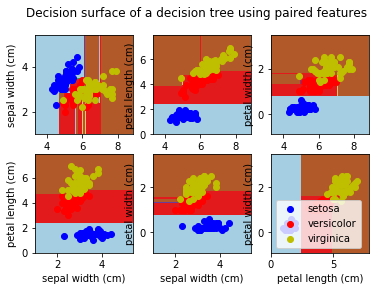

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

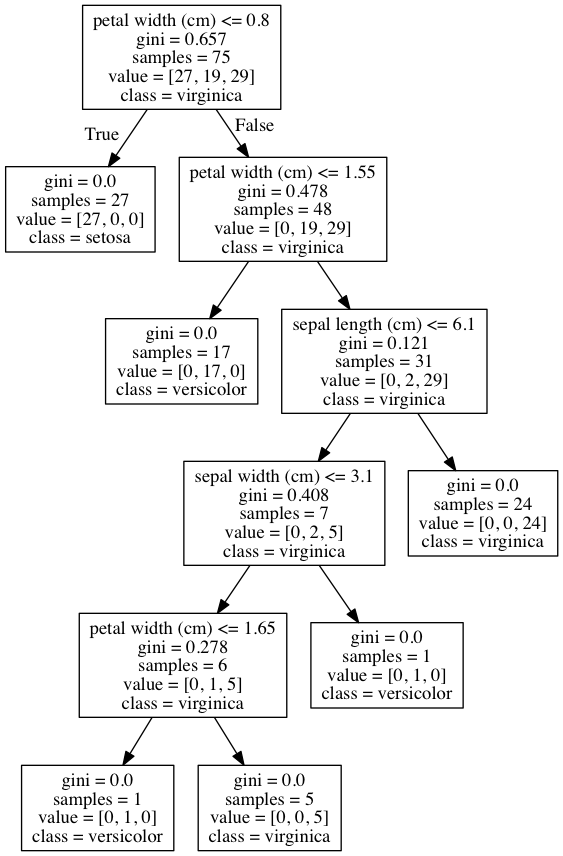

In [6]:
# Visualize
# from scikit decision tree tutorial: http://scikit-learn.org/stable/modules/tree.html
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from IPython.display import display

dot_data = StringIO()
tree.export_graphviz(iris_tree, out_file=dot_data, feature_names=feature_names, class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
image = Image(graph.create_png())
display(image)